In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(37) # 使得每次运行得到的随机数都一样

In [3]:
# 假如有一个模型在测试集上得到的预测结果为：
y_true = [1, 0, 0, 2, 1, 0, 3, 3, 3] # 实际的类别
y_pred = [1, 1, 0, 2, 1, 0, 1, 3, 3] # 模型预测的类别

# 使用sklearn 模块计算混淆矩阵
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_true, y_pred)
print(confusion_mat) #看看混淆矩阵长啥样

[[2 1 0 0]
 [0 2 0 0]
 [0 0 1 0]
 [0 1 0 2]]


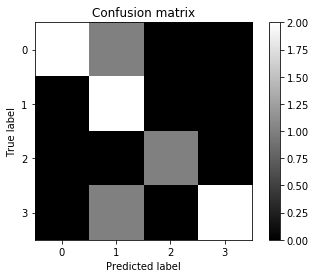

In [4]:
def plot_confusion_matrix(confusion_mat):
    '''将混淆矩阵画图并显示出来'''
    plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.gray)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(confusion_mat.shape[0])
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

plot_confusion_matrix(confusion_mat)

In [5]:
# 打印该模型的性能报告
# 直接使用sklearn打印精度，召回率和F1值
from sklearn.metrics import classification_report
target_names = ['Class-0', 'Class-1', 'Class-2', 'Class-3']
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    Class-0       1.00      0.67      0.80         3
    Class-1       0.50      1.00      0.67         2
    Class-2       1.00      1.00      1.00         1
    Class-3       1.00      0.67      0.80         3

avg / total       0.89      0.78      0.79         9



In [6]:
# 评估朴素贝叶斯多分类模型
# 1， 准备数据集
data_path='D:\PyProjects\DataSet/NaiveBayers/data_multivar.txt'
df=pd.read_csv(data_path,header=None)
dataset_X,dataset_y=df.iloc[:,:-1],df.iloc[:,-1]
dataset_X=dataset_X.values
dataset_y=dataset_y.values
# 将整个数据集划分为train set和test set
from sklearn.cross_validation import train_test_split
train_X, test_X, train_y, test_y=train_test_split(dataset_X,dataset_y,test_size=0.25,random_state=42)

# 构建朴素贝叶斯分类模型
from sklearn.naive_bayes import GaussianNB
gaussianNB_new=GaussianNB()
gaussianNB_new.fit(train_X,train_y)

# 2 用交叉验证来检验模型的准确性，只是在test set上验证准确性
from sklearn.cross_validation import cross_val_score
num_validations=5
accuracy=cross_val_score(gaussianNB_new,test_X,test_y,
                         scoring='accuracy',cv=num_validations)
print('准确率：{:.2f}%'.format(accuracy.mean()*100))
precision=cross_val_score(gaussianNB_new,test_X,test_y,
                         scoring='precision_weighted',cv=num_validations)
print('精确度：{:.2f}%'.format(precision.mean()*100))
recall=cross_val_score(gaussianNB_new,test_X,test_y,
                         scoring='recall_weighted',cv=num_validations)
print('召回率：{:.2f}%'.format(recall.mean()*100))
f1=cross_val_score(gaussianNB_new,test_X,test_y,
                         scoring='f1_weighted',cv=num_validations)
print('F1  值：{:.2f}%'.format(f1.mean()*100))

准确率：99.00%
精确度：99.17%
召回率：99.00%
F1  值：98.97%


c:\users\dingr\appdata\local\programs\python\python35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
# 使用sklearn 模块计算混淆矩阵
y_pred=gaussianNB_new.predict(test_X)
confusion_mat = confusion_matrix(test_y, y_pred)
print(confusion_mat) #看看混淆矩阵长啥样

print('*'*50)
# 打印该模型的性能报告
# 直接使用sklearn打印精度，召回率和F1值
target_names = ['Class-0', 'Class-1', 'Class-2', 'Class-3']
print(classification_report(test_y, y_pred, target_names=target_names))

[[27  0  0  0]
 [ 0 18  0  0]
 [ 0  0 33  0]
 [ 0  0  0 22]]
**************************************************
             precision    recall  f1-score   support

    Class-0       1.00      1.00      1.00        27
    Class-1       1.00      1.00      1.00        18
    Class-2       1.00      1.00      1.00        33
    Class-3       1.00      1.00      1.00        22

avg / total       1.00      1.00      1.00       100

